In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os,glob
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from glob import glob
import tensorflow as tf
from keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline


In [ ]:
print(tf.__version__)
!python --version

2.4.1
Python 3.7.10


In [ ]:
datadir = "/content/drive/MyDrive/Colab Notebooks/img"
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=4,
                                                 directory=datadir,
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=4,
                                                 directory=datadir,
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="validation",
                                                 class_mode='categorical')


Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [ ]:
baseModel = MobileNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(224 ,224,3)))
print(baseModel.summary())

headModel=baseModel.output
headModel=Flatten(name='Flatten')(headModel)
headModel=Dense(128,activation='relu')(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(3,activation='softmax')(headModel)

model=Model(inputs=baseModel.input,outputs=headModel)


for layer in baseModel.layers:
    layer.trainable=False


#print(model.summary())

learning_rate=0.001
Epochs = 5
BS=4

9412608/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
________________

In [ ]:
opt=Adam(lr=learning_rate,decay=learning_rate/Epochs)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

H=model.fit(
    train_dataset,
    steps_per_epoch= train_dataset.samples //BS,
    validation_data=validation_dataset,
    validation_steps= validation_dataset.samples //BS,
    epochs=Epochs
)

Epoch 1/5
60/60 [==============================] - 139s 2s/step - loss: 2.8869 - accuracy: 0.8091 - val_loss: 1.1786e-10 - val_accuracy: 1.0000
Epoch 2/5
60/60 [==============================] - 1s 17ms/step - loss: 0.2133 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 3/5
60/60 [==============================] - 1s 17ms/step - loss: 0.0483 - accuracy: 1.0000 - val_loss: 2.1631e-09 - val_accuracy: 1.0000
Epoch 4/5
60/60 [==============================] - 1s 16ms/step - loss: 0.0525 - accuracy: 0.9985 - val_loss: 2.1996e-14 - val_accuracy: 1.0000
Epoch 5/5
60/60 [==============================] - 1s 17ms/step - loss: 0.0225 - accuracy: 0.9946 - val_loss: 9.8044e-04 - val_accuracy: 1.0000


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/models_/' + 'mobilenet_v2.model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/models_/mobilenet_v2.model/assets


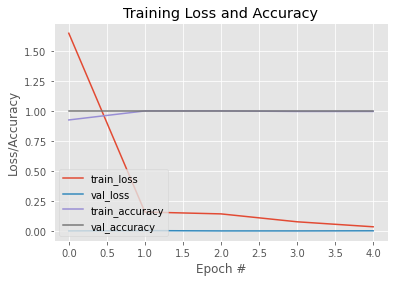

In [ ]:
N = Epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('plot_v2.png')